In [16]:
import requests
import pandas as pd

# Function to get instrument data (as you already have)
def fetch_deribit_options_data(symbol='BTC', kind='option', expiration=None):
    url = f'https://www.deribit.com/api/v2/public/get_instruments?currency={symbol}&kind={kind}&expired=false'
    response = requests.get(url)
    data = response.json()['result']
    
    # Filter by expiration date if provided
    if expiration:
        data = [option for option in data if option['expiration_timestamp'] == expiration]
    
    return data

# Function to get market data for a specific option (to fetch premiums)
def fetch_deribit_option_price(instrument_name):
    url = f"https://www.deribit.com/api/v2/public/get_order_book?instrument_name={instrument_name}"
    response = requests.get(url)
    return response.json().get("result", {}).get("mark_price")

# Fetch BTC options data
btc_options_data = fetch_deribit_options_data(symbol='BTC')

# Create separate DataFrames for calls and puts
calls_data = []
puts_data = []

for option in btc_options_data:
    option_type = option['option_type']
    strike = option['strike']
    instrument_name = option['instrument_name']  # Unique name of the instrument
    
    # Fetch the option premium (mark_price) from the order book
    premium = fetch_deribit_option_price(instrument_name)
    if premium:
        # Only append options where premium exists to avoid missing data issues
        if premium is not None:
            if option_type == 'call':
                calls_data.append({
                    'strike': strike,
                    'lastPrice': premium  # Using 'mark_price' as the premium
                })
            elif option_type == 'put':
                puts_data.append({
                    'strike': strike,
                    'lastPrice': premium  # Using 'mark_price' as the premium
                })

# Convert lists into DataFrames to match the structure of spx_calls and spx_puts
print(calls_data)
spx_calls = pd.DataFrame(calls_data)
spx_puts = pd.DataFrame(puts_data)

# Example of printing the DataFrames to check the structure
print(spx_calls.head())
print(spx_puts.head())

# Now you can use spx_calls and spx_puts in your existing code


[{'strike': 60000.0, 'lastPrice': 0.0988}, {'strike': 61000.0, 'lastPrice': 0.0838}, {'strike': 62000.0, 'lastPrice': 0.0688}, {'strike': 63000.0, 'lastPrice': 0.0538}, {'strike': 64000.0, 'lastPrice': 0.0388}, {'strike': 64500.0, 'lastPrice': 0.0313}, {'strike': 65000.0, 'lastPrice': 0.0239}, {'strike': 65500.0, 'lastPrice': 0.0167}, {'strike': 66000.0, 'lastPrice': 0.0098}, {'strike': 66500.0, 'lastPrice': 0.0043}, {'strike': 67000.0, 'lastPrice': 0.0015}, {'strike': 67500.0, 'lastPrice': 0.0004}, {'strike': 68000.0, 'lastPrice': 0.0002}, {'strike': 68500.0, 'lastPrice': 0.0001}, {'strike': 69000.0, 'lastPrice': 0.0001}, {'strike': 25000.0, 'lastPrice': 0.6247}, {'strike': 30000.0, 'lastPrice': 0.5497}, {'strike': 35000.0, 'lastPrice': 0.4746}, {'strike': 40000.0, 'lastPrice': 0.3995}, {'strike': 42000.0, 'lastPrice': 0.3695}, {'strike': 44000.0, 'lastPrice': 0.3395}, {'strike': 45000.0, 'lastPrice': 0.3245}, {'strike': 46000.0, 'lastPrice': 0.3095}, {'strike': 47000.0, 'lastPrice': 

In [17]:
print(spx_calls.describe())
print(spx_puts.describe())

              strike   lastPrice
count     294.000000  294.000000
mean    73399.659864    0.142860
std     40541.294414    0.176778
min     10000.000000    0.000100
25%     55000.000000    0.007500
50%     65500.000000    0.066500
75%     75000.000000    0.221325
max    300000.000000    0.852700
              strike   lastPrice
count     307.000000  307.000000
mean    75956.026059    0.234941
std     36928.528230    0.457446
min     10000.000000    0.000100
25%     59000.000000    0.005600
50%     69000.000000    0.057100
75%     80000.000000    0.231950
max    300000.000000    3.424000


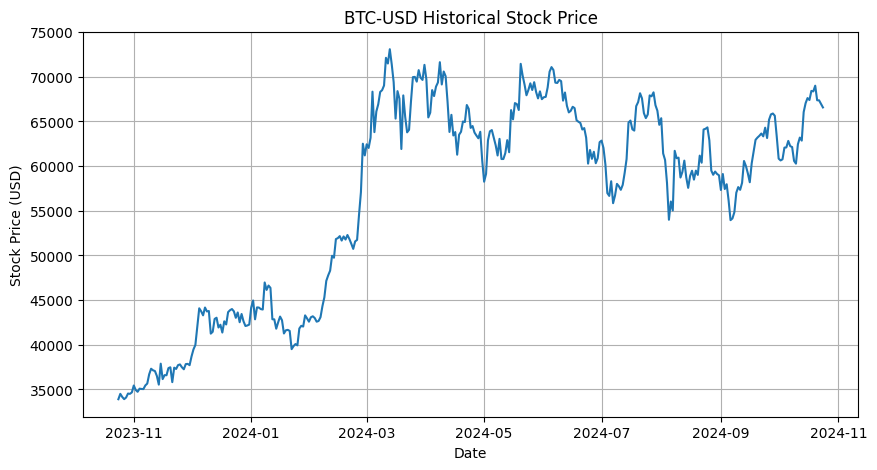

In [18]:
import yfinance as yf
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt
import mplfinance as mpf
import plotly.graph_objects as go
from datetime import datetime
import seaborn as sns
from sklearn.metrics import r2_score



def fetch_options_data(ticker_symbol, expiration_date):
    ticker = yf.Ticker(ticker_symbol)
    options_dates = ticker.options
    # We'll use the nearest expiry date for our analysis
    options_data = ticker.option_chain(options_dates[expiration_date])
    return options_data.calls, options_data.puts

def fetch_historical_stock_data(ticker_symbol, period="1y"):
    ticker = yf.Ticker(ticker_symbol)
    stock_data = ticker.history(period=period)
    
    if stock_data.empty:
        raise ValueError(f"No historical stock data found for ticker '{ticker_symbol}'.")
    return stock_data

ticker_symbol = "BTC-USD"

#^SPX, SPY, BTC-USD

stock_data = fetch_historical_stock_data(ticker_symbol, period="1y")

plt.figure(figsize=(10, 5))
plt.plot(stock_data['Close'])
plt.title(f'{ticker_symbol} Historical Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid(True)


In [19]:
# Fetch available expiration dates
ticker = yf.Ticker(ticker_symbol)
expiration_dates = ticker.options

# Print all available expiration dates
print("Available Expiration Dates for SPX:")
for date in expiration_dates:
    print(date)


EXPIRATION_DATE_INDEX = 20
if EXPIRATION_DATE_INDEX < len(expiration_dates):
    expiration_in_one_month = expiration_dates[EXPIRATION_DATE_INDEX]
else:
    print(f"Error: Expiration date index {EXPIRATION_DATE_INDEX} is out of range. Available indices: 0 to {len(expiration_dates) - 1}")
    expiration_in_one_month = -1
    EXPIRATION_DATE_INDEX = -1

# Print the selected expiration date
print(f"\nFetching options for expiration date: {expiration_in_one_month}")

Available Expiration Dates for SPX:
Error: Expiration date index 20 is out of range. Available indices: 0 to -1

Fetching options for expiration date: -1


66568.359375


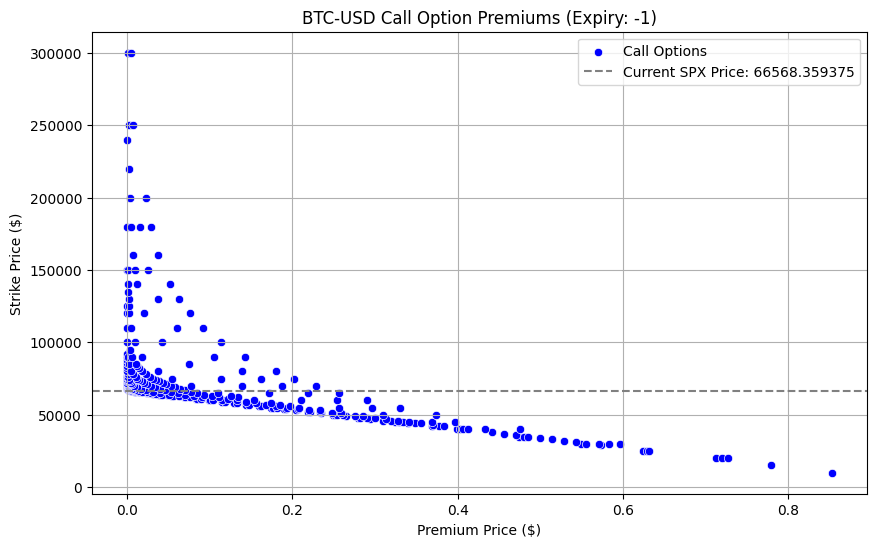

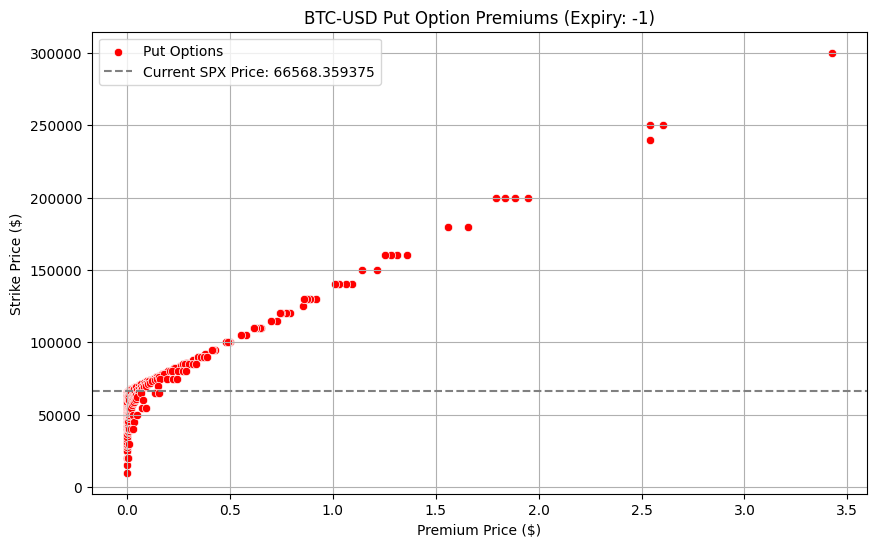

Plotting option premiums for expiration date: -1
Current BTC-USD Price: 66568.359375
Note: The 'lastPrice' represents the most recent trade, which may not always be from today. Check 'volume' for recent trading activity.



In [20]:
def fetch_current_stock_price(ticker_symbol):
    """
    Fetches the current stock price for the given ticker symbol.
    
    Parameters:
    - ticker_symbol (str): The ticker symbol (e.g., 'SPX')
    
    Returns:
    - current_price (float): The latest stock price
    """
    ticker = yf.Ticker(ticker_symbol)
    stock_data = ticker.history(period="1d")
    current_price = stock_data['Close'].iloc[-1]  # Get the most recent closing price
    return current_price

if not ticker_symbol == "BTC-USD":
    spx_calls, spx_puts = fetch_options_data(ticker_symbol, EXPIRATION_DATE_INDEX)

#print(spx_calls)

# Fetch the current stock price
current_stock_price = fetch_current_stock_price(ticker_symbol)
print(current_stock_price)

# Plot Call Option Premiums for SPX with a horizontal line for the current stock price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spx_calls, x='lastPrice', y='strike', color='blue', label='Call Options')
plt.axhline(y=current_stock_price, color='gray', linestyle='--', label=f'Current SPX Price: {current_stock_price}')
plt.title(f'{ticker_symbol} Call Option Premiums (Expiry: {expiration_in_one_month})')
plt.xlabel('Premium Price ($)')
plt.ylabel('Strike Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Put Option Premiums for SPX with a horizontal line for the current stock price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spx_puts, x='lastPrice', y='strike', color='red', label='Put Options')
plt.axhline(y=current_stock_price, color='gray', linestyle='--', label=f'Current SPX Price: {current_stock_price}')
plt.title(f'{ticker_symbol} Put Option Premiums (Expiry: {expiration_in_one_month})')
plt.xlabel('Premium Price ($)')
plt.ylabel('Strike Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Print the expiration date for clarity
print(f"Plotting option premiums for expiration date: {expiration_in_one_month}")
print(f"Current {ticker_symbol} Price: {current_stock_price}")
print("Note: The 'lastPrice' represents the most recent trade, which may not always be from today. Check 'volume' for recent trading activity.\n")

In [21]:
def calculate_historical_volatility(stock_data, window=252):
    log_returns = np.log(stock_data['Close'] / stock_data['Close'].shift(1))
    volatility = np.sqrt(window) * log_returns.std()
    return volatility

volatility = calculate_historical_volatility(stock_data)
print(f"{ticker_symbol} Historical Volatility: {volatility}")

# Fetch data for the 13-week T-bill (^IRX is the ticker for the 13-week Treasury Bill index on Yahoo Finance)
t_bill = yf.Ticker("^IRX")
t_bill_data = t_bill.history(period="1d")

# The yield is typically expressed as an annual percentage, so divide by 100
risk_free_rate = t_bill_data['Close'].iloc[-1] / 100
print(f"Estimated risk-free rate (3-month T-Bill): {risk_free_rate}")

BTC-USD Historical Volatility: 0.4250732677499107
Estimated risk-free rate (3-month T-Bill): 0.04505000114440918


In [22]:
class BlackScholesModel:
    def __init__(self, S, K, T, r, sigma):
        self.S = S        # Underlying asset price
        self.K = K        # Option strike price
        self.T = T        # Time to expiration in years
        self.r = r        # Risk-free interest rate
        self.sigma = sigma  # Volatility of the underlying asset

    def d1(self):
        return (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.T) / (self.sigma * np.sqrt(self.T))
    
    def d2(self):
        return self.d1() - self.sigma * np.sqrt(self.T)
    
    def call_option_price(self):
        return (self.S * si.norm.cdf(self.d1(), 0.0, 1.0) - self.K * np.exp(-self.r * self.T) * si.norm.cdf(self.d2(), 0.0, 1.0))
    
    def put_option_price(self):
        return (self.K * np.exp(-self.r * self.T) * si.norm.cdf(-self.d2(), 0.0, 1.0) - self.S * si.norm.cdf(-self.d1(), 0.0, 1.0))

Number of strike prices call:  294
Number of premium call options:  294
Number of strike prices put:  307
Number of strike prices put:  307
Current stock price: 66568.359375


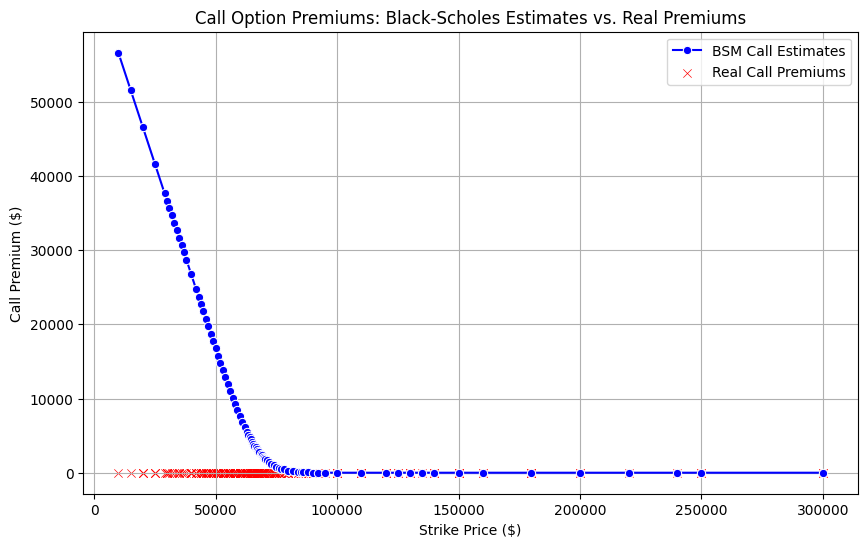

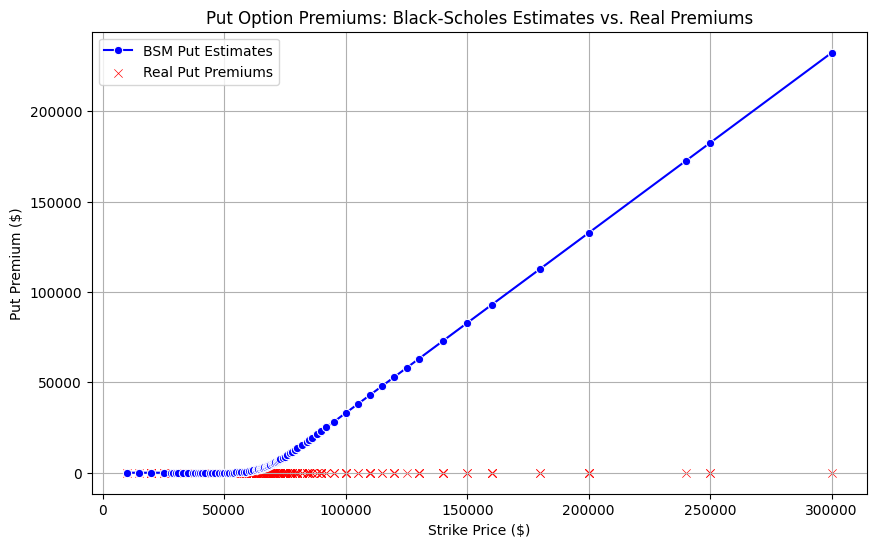

In [23]:
strike_prices_call = spx_calls['strike'].values
strike_prices_put =  spx_puts['strike'].values

real_call_premiums = spx_calls['lastPrice'].values
real_put_premiums = spx_puts['lastPrice'].values

print("Number of strike prices call: ", len(strike_prices_call))
print("Number of premium call options: ", len(real_call_premiums))

print("Number of strike prices put: ",len(strike_prices_put))
print("Number of strike prices put: ",len(real_put_premiums))

bsm_call_premiums = []
bsm_put_premiums = []

print(f"Current stock price: {current_stock_price}")
# Loop through each strike price and calculate the call and put option premiums
for K in strike_prices_call:
    bsm = BlackScholesModel(S=current_stock_price, K=K, T=1/12, r=risk_free_rate, sigma=volatility)
    bsm_call_premiums.append(bsm.call_option_price())

for K in strike_prices_put:
    bsm = BlackScholesModel(S=current_stock_price, K=K, T=1/12, r=risk_free_rate, sigma=volatility)
    bsm_put_premiums.append(bsm.put_option_price())


# Plot Call Option Premiums: Black-Scholes estimates vs. real premiums
plt.figure(figsize=(10, 6))
sns.lineplot(x=strike_prices_call, y=bsm_call_premiums, label='BSM Call Estimates', color='blue', marker='o')
sns.scatterplot(x=strike_prices_call, y=real_call_premiums, label='Real Call Premiums', color='red', marker='x')
plt.title('Call Option Premiums: Black-Scholes Estimates vs. Real Premiums')
plt.xlabel('Strike Price ($)')
plt.ylabel('Call Premium ($)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Put Option Premiums: Black-Scholes estimates vs. real premiums
plt.figure(figsize=(10, 6))
sns.lineplot(x=strike_prices_put, y=bsm_put_premiums, label='BSM Put Estimates', color='blue', marker='o')
sns.scatterplot(x=strike_prices_put, y=real_put_premiums, label='Real Put Premiums', color='red', marker='x')
plt.title('Put Option Premiums: Black-Scholes Estimates vs. Real Premiums')
plt.xlabel('Strike Price ($)')
plt.ylabel('Put Premium ($)')
plt.legend()
plt.grid(True)
plt.show()



In [24]:
# Call option premiums
r2_call = r2_score(real_call_premiums, bsm_call_premiums)

# Put option premiums
r2_put = r2_score(real_put_premiums, bsm_put_premiums)

# Print R² scores
print(f"R² Score for Call Options: {r2_call:.4f}")
print(f"R² Score for Put Options: {r2_put:.4f}")

R² Score for Call Options: -6618757583.6410
R² Score for Put Options: -6110584365.6178
